# Stock Market Forecast

Welcome to my project, where in general terms I try and predict the movements of the stock market through the S&P 500. Throughout the project I will look at ways to try and improve my probability, or "hit score" as called by others, of predicting an up or down day for the S&P500. This means that looking at the daily returns of the S&P500, i.e. negative daily return or positive daily return, I can trade accordingly. Below we will start with visualizations of the predictors. 

As you can see above the Nasdaq will be a very strong predictor of the movements of the S&P500. The Dow Jones will also be another strong predictor. However, if you look at the returns of the three indices you will see that while the overall graphs look to have similar movements with steady increases over time, the day to day returns vary with the DOW having an up day and the nasdaq having a down day. Looking at other indices will help accout for those days.

In [ ]:
# counts the number NAN values
def count_NANs(dataframe):
    """
    count number of NaN in dataframe
    """
    return (dataframe.shape[0] * dataframe.shape[1]) - dataframe.count().sum()


,AdjClose_^N225,Return_^N225
Date,,


The function below grabs all the variabls/indices I chose to represent/predict the market. I decided to add a high yield treasure bond indice because there is a known belief that high correlation exists between high yield bonds and the S&P500. The rest represent major markets throughout the world that have close ties to the U.S. stock market. The function "create_lagged_series" creates the lag for those functions

In [756]:
def getWebData(symbol,start,end):
    df= DataReader(name=symbol,data_source='yahoo',start=start,end=end)
    df.columns.values[-1] = 'AdjClose'
    df.columns = df.columns + '_' + symbol
    df['Return_%s' %symbol] = df['AdjClose_%s' %symbol].pct_change()
    df=df[['AdjClose_%s' %symbol,'Return_%s' %symbol]]
    return df

In [1117]:
getWebData('^MCX','2012-1-1','2015-12-31')

,AdjClose_^MCX,Return_^MCX
Date,,
2013-03-04,1464.449951,NaN
2013-03-05,1486.420044,0.015002
2013-03-06,1491.489990,0.003411
2013-03-07,1491.349976,-0.000094
2013-03-11,1505.930054,0.009776
2013-03-12,1499.739990,-0.004110
2013-03-13,1495.880005,-0.002574
2013-03-14,1502.520020,0.004439
2013-03-15,1496.569946,-0.003960


In [1193]:
def getAllStockData(output):
    
    start=parser.parse('2006-1-1')
    end=parser.parse('2016-1-1')
    
    nikkei=getWebData('^N225',start,end)
    nasdaq=getWebData('^IXIC',start,end)
    frankfurt=getWebData('^GDAXI',start,end)
    london=getWebData('^MCX',start,end)
    paris=getWebData('^FCHI',start,end)
    hkong=getWebData('^HSI',start,end)
    technology=getWebData('VGT',start,end)
    australia=getWebData('^AXJO',start,end)
    energy=getWebData('VDE',start,end)
    djia=getWebData('^DJI',start,end)
    
    bond=getWebData('JNK',start,end)
    
   
    out=getWebData(output,start,end)
    
    
    frames=[nikkei,nasdaq, frankfurt,london,paris,hkong,technology,australia,energy,djia,bond,out]
    
    return frames

In [1194]:

def addFeatures(dataframe, adjclose, returns, n):
    """
    operates on two columns of dataframe:
    - n >= 2
    - given Return_* computes the return of day i respect to day i-n. 
    - given AdjClose_* computes its moving average on n days
 
    """
    
    return_n = adjclose[9:] + "_MultiDay" + str(n)
    dataframe[return_n] = dataframe[adjclose].pct_change(n)
    
    roll_n = returns[7:] + "_RolMean" + str(n)
    dataframe[roll_n] = pd.rolling_mean(dataframe[returns], n)

In [1195]:
def applyRollMeanDelayedReturns(datasets, delta):
    """
    applies rolling mean and delayed returns to each dataframe in the list
    """
    for dataset in datasets:
        columns = dataset.columns    
        adjclose = columns[0]
        returns = columns[1]
        for n in delta:
            addFeatures(dataset, adjclose, returns, n)
    
    return datasets   

In [1196]:
def mergeDataframes(datasets, index):
    
    subset = []
    subset = [dataset.iloc[:, index:] for dataset in datasets[1:]]
    
    first = subset[0].join(subset[1:], how = 'outer')
    finance = datasets[0].iloc[:, index:].join(first, how = 'left') 
    
    return finance

In [1197]:
def fit_model(name, model, X_train, y_train, X_test, pred):
    """Fits a classification model (for our purposes this is LR, LDA and QDA)
    using the training data, then makes a prediction and subsequent "hit rate"
    for the test data."""

    model.fit(X_train, y_train)
    pred[name] = model.predict(X_test)

    # Create a series with 1 being correct direction, 0 being wrong
    # and then calculate the hit rate based on the actual direction
    pred["%s_Correct" % name] = (1.0+pred[name]*pred["Actual"])/2.0
    hit_rate = np.mean(pred["%s_Correct" % name])
    print "%s: %.3f" % (name, hit_rate)

In [1213]:
dataStocks3=getAllStockData('^GSPC')

dataStocks3=applyRollMeanDelayedReturns(dataStocks3,range(1,20))
dataStocks3=mergeDataframes(dataStocks3,0)
dataStocks3=dataStocks3.reset_index()
dataStocks3['Weekday'] = dataStocks3['Date'].dt.dayofweek
dataStocks3=dataStocks3.set_index('Date')
cols=list(dataStocks3)
cols.insert(0, cols.pop(cols.index('Weekday')))
#cols
dataStocks3 = dataStocks3.ix[:, cols]

/Users/connorfreeberg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
/Users/connorfreeberg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
/Users/connorfreeberg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/connorfreeberg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
/Users/connorfreeberg/anacon

In [1214]:
cols=list(dataStocks3)

cols_to_drop = filter(lambda x: x.startswith('Adj'), cols)

dataStocks3= dataStocks3.drop(cols_to_drop, axis=1)

dataStocks3=dataStocks3.interpolate(method='time')

dataStocks3=dataStocks3.fillna(dataStocks3.mean())

dataStocks3["Direction"] = np.sign(dataStocks3["Return_^GSPC"])

#dataStocks3.head()
#count_NANs(dataStocks3)



In [1215]:
dataStocks3['Direction'] = dataStocks3['Direction'].shift(-1)
dataStocks3 = dataStocks3.head(-1)



In [1216]:
le = preprocessing.LabelEncoder()
dataStocks3.Direction[dataStocks3.Direction >= 0] = 'Up'
dataStocks3.Direction[dataStocks3.Direction < 0] = 'Down'

dataStocks3.Direction = le.fit(dataStocks3.Direction).transform(dataStocks3.Direction)
#dataStocks3.tail()
#dataStocks3['Direction']
dataStocks3.shape

(2466, 470)

In [1217]:
features=dataStocks3.columns[0:469]
target='Direction'
#features
X=dataStocks3[features]
#direction prection 
y=dataStocks3[target]

features

Index([u'Weekday', u'Return_^N225', u'^N225_MultiDay1', u'^N225_RolMean1',
       u'^N225_MultiDay2', u'^N225_RolMean2', u'^N225_MultiDay3',
       u'^N225_RolMean3', u'^N225_MultiDay4', u'^N225_RolMean4',
       ...
       u'^GSPC_MultiDay15', u'^GSPC_RolMean15', u'^GSPC_MultiDay16',
       u'^GSPC_RolMean16', u'^GSPC_MultiDay17', u'^GSPC_RolMean17',
       u'^GSPC_MultiDay18', u'^GSPC_RolMean18', u'^GSPC_MultiDay19',
       u'^GSPC_RolMean19'],
      dtype='object', length=469)

In [1218]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=None)

start_test=parser.parse('2014-11-1')

X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

In [1219]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=500,random_state=None)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1220]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)
# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 1.000
Accuracy: 0.510


In [1221]:
# Set list of values to grid search over
l = range(1, 10)
d = [10, 20, 30]
params = {'min_samples_leaf': l, 'max_depth': d}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(n_estimators=20),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy using best param: %0.3f" % gs.best_score_

Best Params:
{'max_depth': 10, 'min_samples_leaf': 4}
Accuracy using best param: 0.532


In [1222]:
def sorted(s, num):
    tmp = s.order(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

/Users/connorfreeberg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


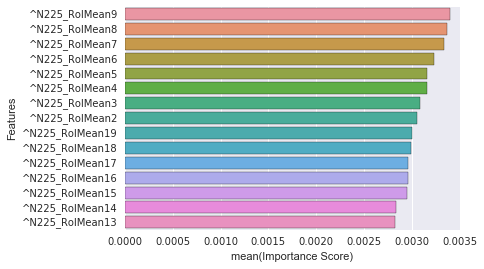

In [1223]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_



features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df=features_df.apply(lambda x: sorted(x, 15))

#features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [902]:
jim1.shift(-1).head()

,0
0,1.0
1,2.0
2,NaN


In [903]:
jim1.shift(-1).head(-1)

,0
0,1.0
1,2.0


In [897]:
?pd.DataFrame.shift()

In [906]:
#move 'Direction' values up back one




dataStocks3.shape

(247, 35)

In [907]:
dataStocks3.groupby('Direction').count()

,Weekday,Return_^N225,^N225_MultiDay1,^N225_RolMean1,Return_^IXIC,^IXIC_MultiDay1,^IXIC_RolMean1,Return_^GDAXI,^GDAXI_MultiDay1,^GDAXI_RolMean1,...,UUP_RolMean1,Return_^DJI,^DJI_MultiDay1,^DJI_RolMean1,Return_JNK,JNK_MultiDay1,JNK_RolMean1,Return_^GSPC,^GSPC_MultiDay1,^GSPC_RolMean1
Direction,,,,,,,,,,,,,,,,,,,,,
-1.0,129,129,129,129,129,129,129,129,129,129,...,129,129,129,129,129,129,129,129,129,129
1.0,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118


In [910]:
y.mean()

0.4777327935222672

Date
2015-01-02    1
2015-01-05    1
2015-01-06    2
2015-01-07    2
2015-01-08    1
Name: Direction, dtype: int64

In [911]:
set(y)

{0, 1}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy: 1.000
Accuracy: 0.517


In [874]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=None),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_


Best Params:
{'n_estimators': 2}
Accuracy of current model: 0.541
Accuracy using best param: 0.497


In [ ]:


#adding lag

#lags=range(4)


#cols=list(dataStocks3) 
#columns = filter(lambda x: x.startswith('Return'), cols)
#for column in columns:
    #for lag in lags:
       # newcolumn = column + str(lag)
        #dataStocks3[newcolumn] = dataStocks3[column].shift(lag)
    


#dataStocks3.head()



In [ ]:
import datetime
import numpy as np
import pandas as pd
import sklearn

from pandas.io.data import DataReader
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA



def create_lagged_series(symbol, start_date, end_date, lags=5):

    # Obtain stock information from Yahoo Finance
    ts = DataReader(symbol, "yahoo", start_date-datetime.timedelta(days=365), end_date)

    # Create the new lagged DataFrame
    tslag = pd.DataFrame(index=ts.index)
    tslag["Today"] = ts["Adj Close"]
    tslag["Volume"] = ts["Volume"]

    # Create the shifted lag series of prior trading period close values
    for i in xrange(0,lags):
        tslag["Lag%s" % str(i+1)] = ts["Adj Close"].shift(i+1)

    # Create the returns DataFrame
    tsret = pd.DataFrame(index=tslag.index)
    tsret["Adj Close"]=ts["Adj Close"]
    tsret["Today"] = tslag["Today"].pct_change()*100.0
    
        
    
    
    # If any of the values of percentage returns equal zero, set them to
    # a small number (stops issues with QDA model in scikit-learn)
    for i,x in enumerate(tsret["Today"]):
        if (abs(x) < 0.0001):
            tsret["Today"][i] = 0.0001

    # Create the lagged percentage returns columns
    for i in xrange(0,lags):
        tsret["Lag%s" % str(i+1)] = tslag["Lag%s" % str(i+1)].pct_change()*100.0
    
    tsret = tsret[tsret.index >= start_date]
    tsret.columns = tsret.columns + '_' + symbol
    return tsret

In [ ]:
#test lag
snpret=create_lagged_series("UUP", datetime.datetime(2013,1,10), datetime.datetime(2014,12,31), lags=5)
snpret.head()

In [ ]:
#Output


In [ ]:
#dataframes
dataStocks=getAllStockData('^GSPC')
dataStocks

As seen in the cell above, the function returns the dataframes as a list for each index with the corresponding 0 or +1 for up or down day. In the above function it takes the adjusted closing price and stores it "today". It then finds the returns of those prices and stores it over the adjusted close value. We don't need the adjusted close value because we are stricly looking at returns.You can also see that each lag number corresponds to how many days back the prices is lagged. The next couple of functions will add features to the dataset. These features will include rolling mean and multi-day return, which finds the difference in returns for different days. This will allow us to see how the mean is changing and how the returns are changing as well. 

In [ ]:

def addFeatures(dataframe, adjclose, returns, n):
    """
    operates on two columns of dataframe:
    - n >= 2
    - given Return_* computes the return of day i respect to day i-n. 
    - given AdjClose_* computes its moving average on n days
 
    """
    
    return_n = adjclose[9:] + "_MultiDay" + str(n)
    dataframe[return_n] = dataframe[adjclose].pct_change(n)
    
    roll_n = returns[7:] + "_RolMean" + str(n)
    dataframe[roll_n] = pd.rolling_mean(dataframe[returns], n)

In [ ]:

def applyRollMeanDelayedReturns(datasets, delta):
    """
    applies rolling mean and delayed returns to each dataframe in the list
    """
    for dataset in datasets:
        columns = dataset.columns    
        adjclose = columns[0]
        returns = columns[1]
        for n in delta:
            addFeatures(dataset, adjclose, returns, n)
    
    return datasets    

Cell below will merge all of the dataframes together. I can see where issues will arise with holidays being different for various countries. I will need a way to adjust for that. 

In [ ]:
applyRollMeanDelayedReturns(dataStocks,range(1,2))

In [ ]:
#Merge datasets

def mergeDataframes(datasets, index):
    
    subset = []
    subset = [dataset.iloc[:, index:] for dataset in datasets[1:]]
    
    first = subset[0].join(subset[1:], how = 'outer')
    finance = datasets[0].iloc[:, index:].join(first, how = 'left') 
    return finance

In [ ]:
dataStocks=getAllStockData('^GSPC')
dataStocks=applyRollMeanDelayedReturns(dataStocks,range(1,2)) 
dataStocks=mergeDataframes(dataStocks,0)
dataStocks['Today_^GSPC']=dataStocks['Today_^GSPC'].shift(-1)
dataStocks['Direction'] = np.sign(dataStocks['Today_^GSPC'])
start_date=datetime.datetime(2015,1,1)
dataStocks = dataStocks[dataStocks.index >= start_date]
dataStocks.head()
#cols = filter(lambda x: x.startswith('Adj'), dataStocks.columns)

#dataStocks=dataStocks.drop(dataStocks.columns[[cols]], axis=0, inplace=True)
#dataStocks=dataStocks[cols].drop(axis=1)
#dataStocks

In [ ]:
all_cols = list(dataStocks.columns)

print all_cols

In [ ]:
cols_to_drop = filter(lambda x: x.startswith('Adj'), all_cols)

In [ ]:
cols_to_drop

In [ ]:
dataStocks= dataStocks.drop(cols_to_drop, axis=1)

dataStocks.head()

In [ ]:
dataStocks = dataStocks.interpolate(method='time')
#fill left overs with mean
dataStocks=dataStocks.fillna(dataStocks.mean())
#set features
count_NANs(dataStocks)


In [ ]:
dataStocks=dataStocks.fillna(dataStocks.mean())
count_NANs(dataStocks)

Below creates a test and train set, while also applying categorical variables to the returns of the S&P 500. Up for postive returns and down for negative returns. We will then go through the classification process to find the best features and model. These methods include: random forrest, k nearest neighbors, support vector machines, adaptive boosting, gradient tree boosting,and quadratic discriminant analysis. I may need to add more features to the data set to get a better representative of the movements. I may need to adjust my variables as well by picking indices that better represent the market movements. 

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
       
#dataStocks['UpDown'] = dataStocks['Today_^GSPC']
#dataStocks.UpDown[dataStocks.UpDown >= 0] = 'Up'
#dataStocks.UpDown[dataStocks.UpDown < 0] = 'Down'
#dataStocks.UpDown = le.fit(dataStocks.UpDown).transform(dataStocks.UpDown)
#features = dataStocks.columns[1:65]
#target=dataStocks.columns[66]
#print features
3 target
#print count_NANs(dataStocks)
#print dataStocks.isnull().sum()
### splitting in train and test set
#index = int(np.floor(dataStocks.shape[0]*0.8))
#train, test = dataStocks[:index], dataStocks[index:]
#print 'Size of train set: ', train.shape
#print 'Size of test set: ', test.shape 

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
#forest = forest.fit(train[features], train['UpDown'])
#print forest.score(test[features],test['UpDown'])

In [ ]:
def UpDownDay(dataset, start_test):

    le = preprocessing.LabelEncoder()
    
    dataset['UpDown'] = dataset['Today_^GSPC']
    dataset.UpDown[dataset.UpDown >= 0] = 'Up'
    dataset.UpDown[dataset.UpDown < 0] = 'Down'
    dataset.UpDown = le.fit(dataset.UpDown).transform(dataset.UpDown)
    
    features = dataset.columns[1:]
    X = dataset[features]    
    y = dataset.UpDown    
    
    X_train = X[X.index < start_test]
    y_train = y[y.index < start_test]              
    
    X_test = X[X.index >= start_test]    
    y_test = y[y.index >= start_test]
    
    return X_train, y_train, X_test, y_test   

In [ ]:

def RandomForrest(X_train, y_train, X_test, y_test, parameters):
    
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(X_train, y_train)   
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [ ]:
# K-Nearest Neighbors
def KNN(X_train, y_train, X_test, y_test, parameters):
    
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [ ]:
#Support Vector Machines
def SVM(X_train, y_train, X_test, y_test, parameters):
  
    c = parameters[0]
    g =  parameters[1]
    clf = SVC()
    clf.fit(X_train, y_train)
 
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy



In [ ]:
#Adaptive Boosting

def AdaptBoostClass(X_train, y_train, X_test, y_test, parameters):
    """
    Ada Boosting binary Classification
    """
    n = parameters[0]
    l =  parameters[1]
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [ ]:
#Gradient Tree Boosting
def GradientTreeBoost(X_train, y_train, X_test, y_test, parameters):
 
    clf = GradientBoostingClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
 
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [ ]:
#Quadratic Discriminiatve Analysis

def GDA(X_train, y_train, X_test, y_test, parameters):
   
  
    
    X_train = X_train.apply(replaceTiny)
    X_test = X_test.apply(replaceTiny)
    
    clf = QDA()
    clf.fit(X_train, y_train)
 
   
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy